In [107]:
import os
import inspect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches


# currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
# parentdir = os.path.dirname(currentdir)
os.chdir(r'/RG/rg-tal/orlev/Face-Recognition-Of-Masked-Faces')
from config_file import ALL_MASKS
from helpers import get_model, read_images, get_1id_pose, resize_image, img_output_bbox, project_3d
from create_masks import masks_templates, load_3dmm

In [8]:
img_src = '/RG/rg-tal/orlev/datasets/original_ds/lfw/Raoul_Ruiz/Raoul_Ruiz_0004.jpg'
img_src = '/RG/rg-tal/orlev/datasets/original_ds/lfw/Pierre_Gagnon/Pierre_Gagnon_0001.jpg'

In [9]:
masks_to_create = masks_templates(ALL_MASKS)


# Get img2pose model
model, transform = get_model()
img = plt.imread(img_src, 1)
results = model.predict([transform(img)])[0]
pose, bbox = get_1id_pose(results, img, 0)

Model will use 1 GPUs!


In [10]:
r_img, scale_factor = resize_image(img, bbox)

# output image selected area
output_bbox = img_output_bbox(img, bbox, 0.25, True)

# project 3D face according to pose
df_3dh = project_3d(r_img, pose)

verts, vertsr = load_3dmm()
x=vertsr[:,0];y=vertsr[:,1];z=vertsr[:,2];

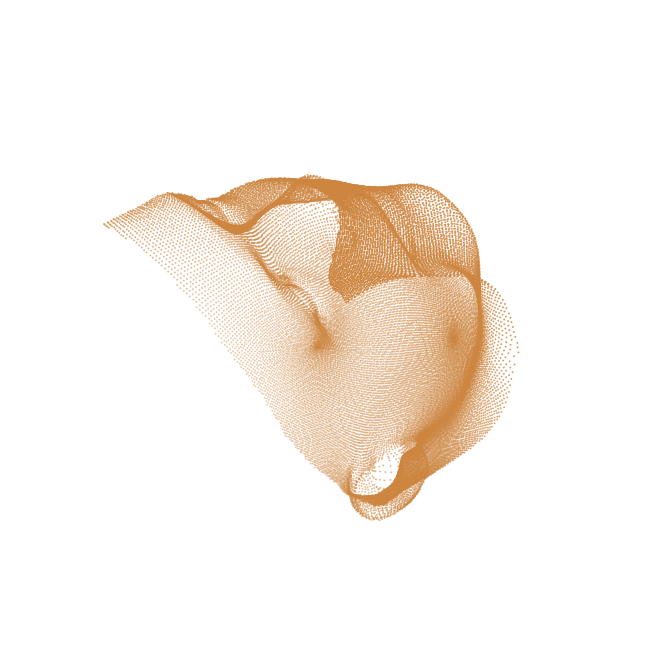

In [104]:
face_color = 'peru'


fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

# ax.plot_surface(r_img, aspect = 'auto')
ax.scatter(df_3dh['x'].to_numpy(), -df_3dh['y'].to_numpy(), df_3dh['z'].to_numpy(), s=1, color=face_color)
ax.view_init(-30,-150)
# Hide grid lines
ax.grid(False)

# Hide axes ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
plt.axis('off')

# plt.axis([-50, 50, -50, 50])
plt.gca().invert_xaxis()
plt.show()

In [158]:
df=pd.DataFrame()
df['x'] = x; df['y'] = y; df['z'] = z
df= df[df['x'] < 0.1]
# df= df[(-0.8<df['x']) & (df['x'] < 0.3)]

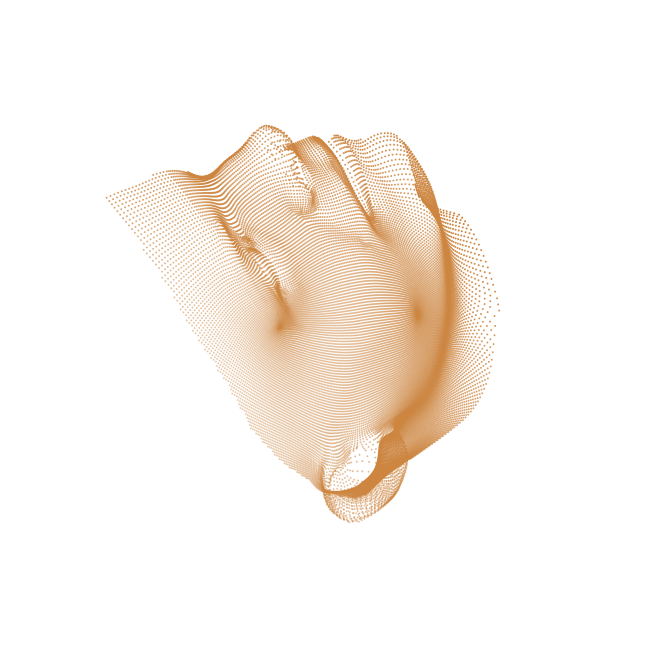

In [161]:
face_color = 'peru'


fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

# ax.plot_surface(r_img, aspect = 'auto')
ax.scatter(df['x'],df['y'],df['z'], s=1, color=face_color)
ax.view_init(-30,-160)
# Hide grid lines
ax.grid(False)

# Hide axes ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
plt.axis('off')

# plt.axis([-50, 50, -50, 50])
plt.gca().invert_xaxis()
plt.show()

(-0.5, 894.5, 894.5, -0.5)

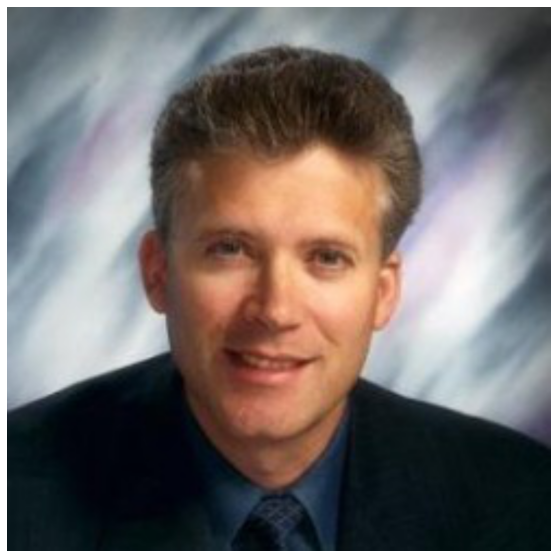

In [137]:
plt.figure(figsize=(10,10))
plt.imshow(r_img)
plt.axis('off')
